<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/INexamenfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import random as rn
import math
import matplotlib.pyplot as plt

# Paso I: decidir si interactúa o no

<>:56: SyntaxWarning: invalid escape sequence '\e'
<>:63: SyntaxWarning: invalid escape sequence '\e'
<>:85: SyntaxWarning: invalid escape sequence '\e'
<>:92: SyntaxWarning: invalid escape sequence '\e'
<>:56: SyntaxWarning: invalid escape sequence '\e'
<>:63: SyntaxWarning: invalid escape sequence '\e'
<>:85: SyntaxWarning: invalid escape sequence '\e'
<>:92: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1386426752.py:56: SyntaxWarning: invalid escape sequence '\e'
  plt.xticks(x, ["$\emptyset$", "int"], fontsize=14)
/tmp/ipython-input-1386426752.py:63: SyntaxWarning: invalid escape sequence '\e'
  tick_labels.append(f"$P(\emptyset)$")
/tmp/ipython-input-1386426752.py:85: SyntaxWarning: invalid escape sequence '\e'
  plt.xticks(x, ["$\emptyset$", "int"], fontsize=14)
/tmp/ipython-input-1386426752.py:92: SyntaxWarning: invalid escape sequence '\e'
  tick_labels.append(f"$F(\emptyset)$")


Frecuencias simuladas:
No interacción = 0.1123
Interacción    = 0.8877


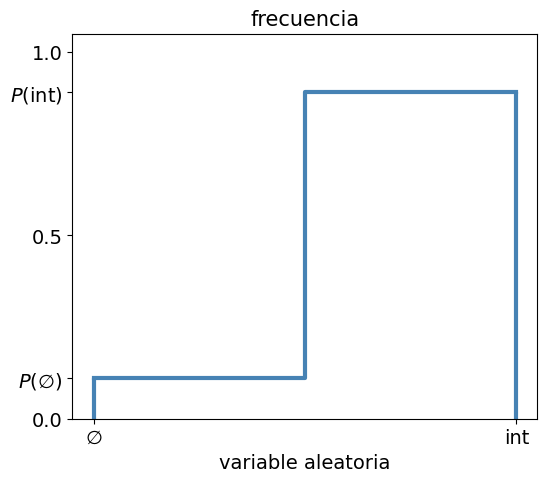

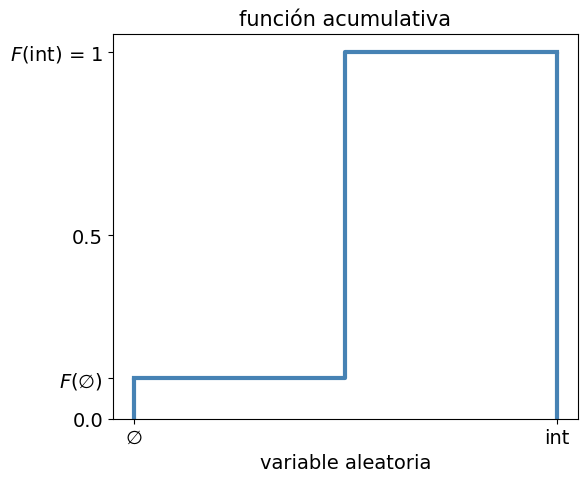

In [3]:
# Parámetros físicos (los coeficientes de atenuación hay que cambiarlos luego por los que deduzcamos con los datos del NIST)
rho = 3.667               # densidad del NaI
mu_f = 1.079e-02*rho      # coeficiente de atenuación (fotoeléctrico)
mu_C = 6.822e-02*rho      # coeficiente de atenuación (Compton)
t = 3*2.54        # [cm] ('' a cm)
mu = mu_f + mu_C  # coeficiente de atenuación lineal

# Probabilidades
Pno = np.exp(-mu * t)         # no interactúa
Pint = 1 - Pno               # interactúa

# Distribución discreta
pdf = np.array([Pno, Pint])

# Función acumulativa
F = np.cumsum(pdf)

def muestrear_interaccion(N, F):    # para decidir interacciones y no interacciones
    rn.seed(123)                    # aleatoriamente
    resultados = []                 # guarda la interacción o no interacción
    for _ in range(N):              # para cada fotón
        r = rn.random()             # saco un número aleatorio

        if r < F[0]:                # si el número aleatorio entra en la probabilidad de no interactuar
            resultados.append(0)    # no hay interacción y lo guardo
        else:                       # si el número aleatorio entra en la probabilidad de interactuar
            resultados.append(1)    # interactúa y lo guardo
    return np.array(resultados)     # resultados de "sí" y "no"


N = 10000                                          # número de fotones
F = np.cumsum(pdf)                                 # función acumulativa
datos = muestrear_interaccion(N, F)                # corro la función de decisión interacción/no interacción

# Conteos simulados
conteo_no = np.sum(datos == 0)                     # parte del array de no interacciones
conteo_int = np.sum(datos == 1)                    # parte del array de interacciones

print("Frecuencias simuladas:")
print("No interacción =", conteo_no/N)
print("Interacción    =", conteo_int/N)


# plots
x = np.array([0, 1])                                 # posibilidades en el eje x

# plot de frecuencia (PDF)

plt.figure(figsize=(6,5))

plt.step(x, pdf, where='mid', linewidth=3, color='steelblue')

for i in range(len(x)):
    plt.vlines(x[i], 0, pdf[i], colors='steelblue', linewidth=3)

plt.xticks(x, ["$\emptyset$", "int"], fontsize=14)
ticks = [0, 0.5, 1, Pno, Pint]
ticks = sorted(set(np.round(ticks, 6)))

tick_labels = []
for val in ticks:
    if abs(val - Pno) < 1e-6:
        tick_labels.append(f"$P(\emptyset)$")
    elif abs(val - Pint) < 1e-6:
        tick_labels.append(f"$P$(int)")
    else:
        tick_labels.append(f"{val:.1f}")

plt.yticks(ticks, tick_labels, fontsize = 14)
plt.ylim(0, 1.05)
plt.title("frecuencia", fontsize=15)
plt.xlabel("variable aleatoria", fontsize=14)

plt.show()

# plot de función acumulativa (CDF)

plt.figure(figsize=(6,5))

plt.step(x, F, where='mid', linewidth=3, color='steelblue')

for i in range(len(x)):
    plt.vlines(x[i], 0, F[i], colors='steelblue', linewidth=3)

plt.xticks(x, ["$\emptyset$", "int"], fontsize=14)
ticks = [0, 0.5, 1, F[0], 1]
ticks = sorted(set(np.round(ticks, 6)))

tick_labels = []
for val in ticks:
    if abs(val - F[0]) < 1e-6:
        tick_labels.append(f"$F(\emptyset)$")
    elif abs(val - 1) < 1e-6:
        tick_labels.append("$F$(int) = 1")
    else:
        tick_labels.append(f"{val:.1f}")

plt.yticks(ticks, tick_labels, fontsize=14)
plt.ylim(0, 1.05)
plt.title("función acumulativa", fontsize=15)
plt.xlabel("variable aleatoria", fontsize=14)

plt.show()

#Paso II: si interactúa, ¿Compton o fotoeléctrico?

In [4]:
def acumulada(pdf):                                 # construcción de la función acumulativa
    return np.cumsum(pdf)

rn.seed(123)                                        # semilla aleatoria replicable

# el paso 1, ¿hay o no hay interacción?

def pdf_interaccion_total(mu_f, mu_C, t):           # las probabilidades de interacción y no interacción
    mu = mu_f + mu_C
    Pno = np.exp(-mu * t)
    Pint = 1 - Pno
    return np.array([Pno, Pint])


def paso1_interaccion(mu_f, mu_C, t):           # decide si hay interacción o no
    pdf = pdf_interaccion_total(mu_f, mu_C, t)
    F = acumulada(pdf)

    r = rn.random()                                 # número aleatorio para decidir

    if r < F[0]:                                    # r cae en la probabilidad de no interactuar
        return 0                                    # no interactúa
    else:                                           # r cae en la probabilidad de interactuar
        return 1                                    # interactúa


# el paso 2, SI HAY INTERACCIÓN, ¿Compton o fotoeléctrico?

def pdf_tipo_interaccion(mu_f, mu_C):               # las probabilidades definidas en el documento
    mu = mu_f + mu_C
    P_f = mu_f / mu
    P_c = mu_C / mu
    return np.array([P_f, P_c])


def paso2_tipo_interaccion(mu_f, mu_C):             # decide el tipo de interacción. Decide con la acumulativa: 0 = fotoeléctrico, 1 = Compton
    pdf = pdf_tipo_interaccion(mu_f, mu_C)
    F   = acumulada(pdf)

    r = rn.random()
    if r < F[0]:                                    # si el número aleatorio cae en la probabilidad de efecto fotoeléctrico
        return 0                                    # fotoeléctrico
    else:                                           # si el número aleatorio no cae en la probabilidad de efecto fotoeléctrico
        return 1                                    # Compton


# acople de la simulación

def simular_foton(mu_f, mu_C, t):

    # paso 1
    paso1 = paso1_interaccion(mu_f, mu_C, t)

    if paso1 == 0:
        return -1                                   # -1 es indicador de que no interactúa

    # paso 2
    paso2 = paso2_tipo_interaccion(mu_f, mu_C)
    return paso2                                    # indica el tipo de interacción


# ahora sí, el bucle externo:

rho = 3.667
mu_f = 1.079e-02 * rho
mu_C = 6.822e-02 * rho
t = 3 * 2.54

N = 100000                                              # número de fotones que voy a simular

conteo_no = 0                                           # inicializo contadores de cada caso
conteo_foto = 0
conteo_comp = 0

for _ in range(N):                                      # para cada fotón
    resultado = simular_foton(mu_f, mu_C, t)            # aplico los pasos 1 y 2

    if resultado == -1:                                 # no interactúa
        conteo_no += 1                                  # aumento el contador de no interactuar
        continue                                        # ¡salto al siguiente fotón!

    elif resultado == 0:                                # interactúa y es fotoeléctrico
        conteo_foto += 1                                # aumento el contador de fotoeléctrico

    elif resultado == 1:                                # interactúa y es Compton
        conteo_comp += 1                                # aumento el contador de Compton

print("Frecuencias simuladas:")
print("No interacción =", conteo_no/N)
print("Fotoeléctrico  =", conteo_foto/N)
print("Compton        =", conteo_comp/N)
print("N+F+C =", conteo_no/N + conteo_foto/N + conteo_comp/N)


Frecuencias simuladas:
No interacción = 0.11018
Fotoeléctrico  = 0.12275
Compton        = 0.76707
N+F+C = 1.0


# Paso III: si la interacción resultante es fotoeléctrico, se añade una cuenta al fotopico.

In [7]:
def acumulada(pdf):                                 # construcción de la función acumulativa
    return np.cumsum(pdf)

rn.seed(123)                                        # semilla aleatoria replicable

# el paso 1, ¿hay o no hay interacción?

def pdf_interaccion_total(mu_f, mu_C, t):           # las probabilidades de interacción y no interacción
    mu = mu_f + mu_C
    Pno = np.exp(-mu * t)
    Pint = 1 - Pno
    return np.array([Pno, Pint])


def paso1_interaccion(mu_f, mu_C, t):               # decide si hay interacción o no
    pdf = pdf_interaccion_total(mu_f, mu_C, t)
    F = acumulada(pdf)

    r = rn.random()                                 # número aleatorio para decidir

    if r < F[0]:                                    # r cae en la probabilidad de no interactuar
        return 0                                    # no interactúa
    else:                                           # r cae en la probabilidad de interactuar
        return 1                                    # interactúa


# el paso 2, SI HAY INTERACCIÓN, ¿Compton o fotoeléctrico?

def pdf_tipo_interaccion(mu_f, mu_C):               # las probabilidades definidas en el documento
    mu = mu_f + mu_C
    P_f = mu_f / mu
    P_c = mu_C / mu
    return np.array([P_f, P_c])


def paso2_tipo_interaccion(mu_f, mu_C):             # decide el tipo de interacción. Decide con la acumulativa: 0 = fotoeléctrico, 1 = Compton
    pdf = pdf_tipo_interaccion(mu_f, mu_C)
    F   = acumulada(pdf)

    r = rn.random()
    if r < F[0]:                                    # si el número aleatorio cae en la probabilidad de efecto fotoeléctrico
        return 0                                    # fotoeléctrico
    else:                                           # si el número aleatorio no cae en la probabilidad de efecto fotoeléctrico
        return 1                                    # Compton


# el paso 3, si la interacción es fotoeléctrico, añado un conteo al fotopico
def simular_fotones(N, mu_f, mu_C, t):

    histograma_f = 0                                     # inicializo las cuentas del fotopico
    tipos = []                                          # tipo de interacción

    for _ in range(N):                                  # para todos los fotones

        # Paso 1: interacción sí/no
        inter = paso1_interaccion(mu_f, mu_C, t)
        if inter == 0:
            continue                                    # si no interactúa, no añado conteo y salto al siguiente fotón

        # Paso 2: tipo de interacción
        tipo = paso2_tipo_interaccion(mu_f, mu_C)
        tipos.append(tipo)                              # guardo el tipo de interacción

        # Paso 3: conteo en el fotopico para  efecto fotoeléctrico
        if tipo == 0:                                   # 0 = fotoeléctrico
            histograma_f += 1                       # sumo en el fotopico

    return histograma_f, tipos


# prueba de simulación

rho = 3.667
mu_f = 1.079e-02 * rho
mu_C = 6.822e-02 * rho
t = 3 * 2.54

N = 100000

fotopico, tipos = simular_fotones(N, mu_f, mu_C, t)

print("Fotones en el fotopico =", fotopico)
print("Fotoeléctricos =", tipos.count(0))
print("Compton       =", tipos.count(1))

Fotones en el fotopico = 12275
Fotoeléctricos = 12275
Compton       = 76707


#Paso IV: si la interacción resultante es Compton, definir la energía detectada del electrón

In [17]:
# constantes físicas
mec2 = 511.0                                      # [keV] masa del electrón


# probabilidad estadística del examen
def PEe(Ee, E1):
    eps = E1 / mec2
    Ee = np.array(Ee, dtype=float)
    Ee_max = E1 * (2*eps) / (1 + 2*eps)
    eps_e = Ee / E1
    tiny = 1e-12
    eps_e = np.clip(eps_e, tiny, 1.0 - tiny)

    term1 = 2.0
    term2 = (eps_e**2) / (eps**2 * (1.0 - eps_e)**2)
    term3 = (eps_e / (1.0 - eps_e)) * (eps_e - 2.0/eps)

    ds = (term1 + term2 + term3)

    # fuera del rango físico (Ee<0 o Ee>Ee_max) fuerzo a 0
    ds = np.where((Ee >= 0) & (Ee <= Ee_max), ds, 0.0)
    # si ds tiene valores negativos por errores numéricos, trunco a 0
    ds = np.where(ds > 0, ds, 0.0)
    return ds, Ee_max

# construyo pdf y cdf numérica en Ee mediante discretización
def construir_pdf_cdf_Ee(E1, n_bins=2000):

    _, Ee_max = PEe([0.0], E1)                 # llamo para obtener Ee_max
    # construyo los centros de los bins
    edges = np.linspace(0.0, Ee_max, n_bins + 1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    bin_width = edges[1] - edges[0]

    ds_vals, _ = PEe(centers, E1)
    # pdf proporcional a ds_vals; normalizo para que la integral = 1
    integral_approx = np.sum(ds_vals * bin_width)
    if integral_approx <= 0:
        raise RuntimeError("Integral de PEe nula o negativa. Revisa E1.")
    pdf = (ds_vals / integral_approx)   # ahora ∑ pdf*bin_width = 1
    cdf = np.cumsum(pdf * bin_width)   # cdf[i] = integral hasta centro i
    # me aseguro de que cdf final sea exactamente 1.0
    cdf = cdf / cdf[-1]
    return centers, pdf, cdf, bin_width, Ee_max


# muestreo por transformada inversa (usando cdf discreta)
def sample_Ee_from_cdf(centers, pdf, cdf, bin_width, n_samples=1, seed=123):

    if seed is not None:
        rn.seed(seed)
    samples = np.zeros(n_samples)
    for k in range(n_samples):
        r = rn.random()

        # índice donde cdf >= r
        i = np.searchsorted(cdf, r, side='left')
        if i >= len(centers):
            i = len(centers) - 1

        u = rn.random()
        Ee_sample = centers[i] + (u - 0.5) * bin_width

        Ee_sample = float(np.clip(Ee_sample, 0.0, centers[-1]))
        samples[k] = Ee_sample
    return samples if n_samples > 1 else samples[0]

# integro a la simulación: cuando tipo==1 (Compton) muestreo Ee
def simular_fotones_con_Compton(N, mu_f, mu_C, t, E1, centers, pdf, cdf, bin_width):

    cuentas_fotopico = 0
    fotopico_energies = []   # energías depositadas por fotoeléctrico (normalmente E1, que en este caso es 662 keV)
    compton_energies = []    # energías electrónicas muestreadas Ee

    for _ in range(N):
        paso1 = paso1_interaccion(mu_f, mu_C, t)                                # paso 1: ¿hay interacción?
        if paso1 == 0:
            continue
        tipo = paso2_tipo_interaccion(mu_f, mu_C)                               # paso 2: ¿Compton o fotoeléctrico?
        if tipo == 0:                                                           # fotoeléctrico --> sumo al fotopico
            cuentas_fotopico += 1
            fotopico_energies.append(E1)
        else:                                                                   # Compton --> ...
            Ee = sample_Ee_from_cdf(centers, pdf, cdf, bin_width, n_samples=1)  # dejo que "Monte Carlo decida la energía"
            compton_energies.append(Ee)

    return cuentas_fotopico, fotopico_energies, compton_energies



# prueba del código
# calculo pdf/cdf para E1=662 keV
E1 = 662.0
centers, pdf, cdf, bin_width, Ee_max = construir_pdf_cdf_Ee(E1, n_bins=2000)
print("Ee_max =", Ee_max, "keV")

# parámetros
rho = 3.667               # densidad del NaI
mu_f = 1.079e-02*rho      # coeficiente de atenuación (fotoeléctrico)
mu_C = 6.822e-02*rho      # coeficiente de atenuación (Compton)
t = 3 * 2.54

# simulo
N = 1000000
cuentas_fotopico, fotopico_es, compton_es = simular_fotones_con_Compton(
    N, mu_f, mu_C, t, E1, centers, pdf, cdf, bin_width)

print("fotopico: ", cuentas_fotopico)
print("eventos Compton:", len(compton_es))


Ee_max = 477.65013623978206 keV
fotopico:  666667
eventos Compton: 333333


Una pequeña verificación de que estoy simulando la $P(E_e)$ bien

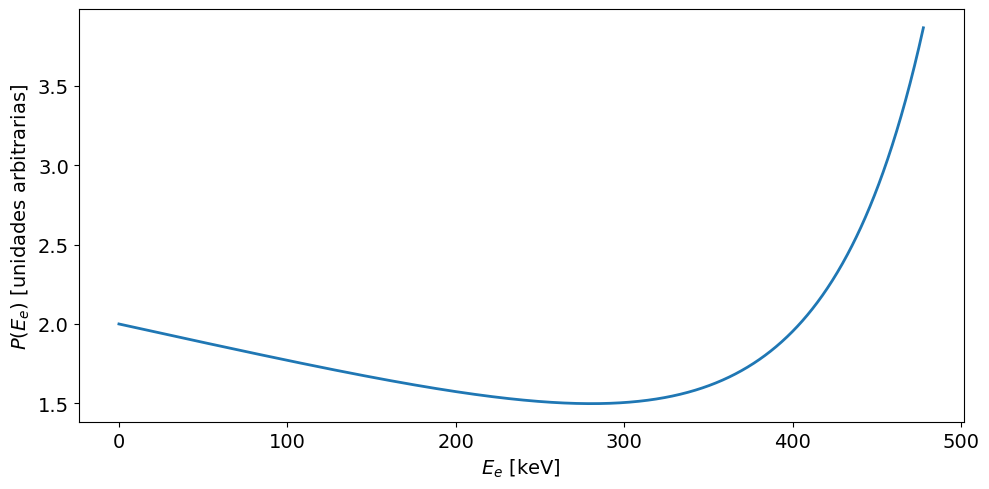

E_e,max = 477.65013623978206 keV


In [23]:
def plot_PEe(E1):
    Ee_grid = np.linspace(0, E1, 2000)            # muestra de Ee desde 0 a Emax
    ds_vals, Ee_max = PEe(Ee_grid, E1)

    mask = Ee_grid <= Ee_max
    Ee_plot = Ee_grid[mask]
    ds_plot = ds_vals[mask]

    plt.figure(figsize=(10,5))
    plt.plot(Ee_plot, ds_plot, linewidth=2)

    plt.xlabel(r"$E_e$ [keV]", fontsize=14)
    plt.ylabel(r"$P(E_e)$ [unidades arbitrarias]", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.tight_layout()
    plt.show()

    print("E_e,max =", Ee_max, "keV")

# para 662 keV
plot_PEe(662)


#Paso V: incluya FWHM como la incertidumbre adquirida por el proceso físico de detección

<>:136: SyntaxWarning: invalid escape sequence '\g'
<>:137: SyntaxWarning: invalid escape sequence '\g'
<>:136: SyntaxWarning: invalid escape sequence '\g'
<>:137: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-166893051.py:136: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$E_\gamma$ [keV]", fontsize=14)
/tmp/ipython-input-166893051.py:137: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)


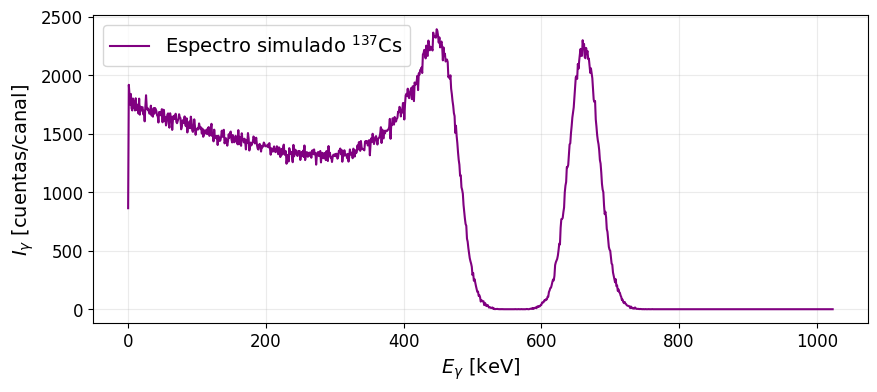

477.65013623978206


In [8]:
mec2 = 511.0  # keV
rn.seed(123)

# función experimental del FWHM (encontrada en el informe 2. Aquí estaba trabajando con 1024 canales)
def FWHM_fn(E):
    return -1.9+2.05*np.sqrt(E)

def energia_detectada(E, FWHM_fn):                          # la función recibe la energía E, y usa FWHM para...
    FWHM = FWHM_fn(E)
    FWHM = max(FWHM, 0.0)
    sigma = FWHM / 2.35
    return np.random.normal(loc=E, scale=sigma)             # retornar una energía aleatoria obtenida de una distribución gaussiana obtenida con el \sigma del examen

def calibracion(E):                                         # calibración: 1 keV = 1 canal (8)
    return E


# Paso I: ¿interactúa o no?

def acumulada(pdf):
    return np.cumsum(pdf)

def paso1_interaccion(mu_f, mu_C, t):
    mu = mu_f + mu_C
    P_int = 1 - np.exp(-mu * t)
    pdf = np.array([1-P_int, P_int])
    F = acumulada(pdf)
    r = rn.random()
    return 0 if r < F[0] else 1


# Paso II: ¿interacción f o C?

def paso2_tipo_interaccion(mu_f, mu_C):
    P_f = mu_f / (mu_f + mu_C)
    pdf = np.array([P_f, 1-P_f])
    F = acumulada(pdf)
    r = rn.random()
    return 0 if r < F[0] else 1   # 0=foto, 1=Compton


# Paso III, IV: qué hacer con fotoeléctrico y Compton

def PEe(Ee, E1):
    eps = E1 / mec2
    tiny = 1e-12
    Ee = np.array(Ee)
    eps_e = Ee/E1
    eps_e = np.clip(eps_e, tiny, 1-tiny)

    term1 = 2
    term2 = (eps_e**2)/(eps**2*(1-eps_e)**2)
    term3 = (eps_e/(1-eps_e))*(eps_e - 2/eps)

    ds =(term1+term2+term3)
    ds = np.where(ds>0, ds, 0)
    Ee_max = E1*(2*eps)/(1+2*eps)
    ds = np.where(Ee<=Ee_max, ds, 0)
    return ds, Ee_max


def construir_cdf_from_PEe(E1, n_bins=2000):
    _, Ee_max = PEe([0], E1)
    edges = np.linspace(0, Ee_max, n_bins+1)
    centers = 0.5*(edges[:-1]+edges[1:])
    binw = edges[1]-edges[0]

    ds, _ = PEe(centers, E1)
    integral = np.sum(ds*binw)
    pdf = ds/integral
    cdf = np.cumsum(pdf*binw)
    cdf /= cdf[-1]
    return centers, pdf, cdf, binw, Ee_max


def sample_Ee_from_cdf(centers, cdf, binw):
    r = rn.random()
    i = np.searchsorted(cdf, r, side="left")
    if i >= len(centers):
        i = len(centers)-1
    return float(np.clip(centers[i] + (rn.random()-0.5)*binw, 0, centers[-1]))


# simulación acoplada del modelo A

def simular_ModeloA(
        N, mu_f, mu_C, t, E1,
        centers, pdf, cdf, binw,
        N_CHANNELS=1024):

    hist = np.zeros(N_CHANNELS, dtype=int)

    for _ in range(N):

        # Paso I
        if paso1_interaccion(mu_f, mu_C, t) == 0:
            continue

        # Paso II
        tipo = paso2_tipo_interaccion(mu_f, mu_C)

        # Paso III–IV
        if tipo == 0:      # fotoeléctrico
            E_dep = E1
        else:              # Compton
            E_dep = sample_Ee_from_cdf(centers, cdf, binw)

        # Paso V: resolución con FWHM
        E_med = energia_detectada(E_dep, FWHM_fn)

        # Convertir a canal
        canal = int(round(calibracion(E_med)))
        if 0 <= canal < N_CHANNELS:
            hist[canal] += 1

    return hist


# Parámetros para la simulación

E1 = 662.0                # energía del fotón original [keV]
rho = 3.667               # densidad del NaI
mu_f = 1.079e-02*rho      # coeficiente de atenuación (fotoeléctrico)
mu_C = 6.822e-02*rho      # coeficiente de atenuación (Compton)
t = 3 * 2.54              # grosor efectivo (cm)
N = 1000000               # fotones a simular

centers, pdf, cdf, binw, Ee_max = construir_cdf_from_PEe(E1)

histograma = simular_ModeloA(N, mu_f, mu_C, t, E1,
                             centers, pdf, cdf, binw,
                             N_CHANNELS=1024)

plt.figure(figsize=(10,4))
plt.plot(histograma, label='Espectro simulado $^{137}$Cs', color='purple')
plt.xlabel("$E_\gamma$ [keV]", fontsize=14)
plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(alpha=0.25)
plt.show()
print(Ee_max)

...¿Y para dos interacciones?, ¿y para N?

<>:157: SyntaxWarning: invalid escape sequence '\g'
<>:158: SyntaxWarning: invalid escape sequence '\g'
<>:157: SyntaxWarning: invalid escape sequence '\g'
<>:158: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-3223567619.py:157: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$E_\gamma$ [keV]", fontsize=14)
/tmp/ipython-input-3223567619.py:158: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)


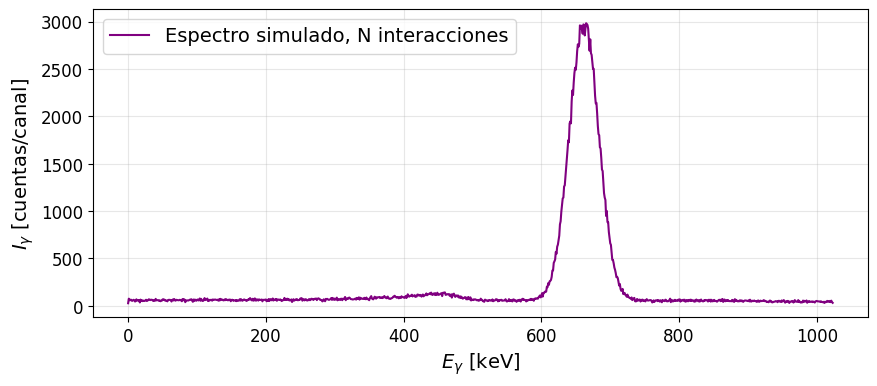

Ee_max = 477.65013623978206


In [17]:
mec2 = 511.0  # keV
rn.seed(123)

def FWHM_fn(E):
    return -1.9 + 2.05*np.sqrt(E)

def energia_detectada(E, FWHM_fn):
    FWHM = FWHM_fn(E)
    FWHM = max(FWHM, 0.0)
    sigma = FWHM / 2.35
    return np.random.normal(loc=E, scale=sigma)

def calibracion(E):
    return E


def acumulada(pdf):
    return np.cumsum(pdf)

def paso1_interaccion(mu_f, mu_C, t):
    mu = mu_f + mu_C
    P_int = 1 - np.exp(-mu * t)
    pdf = np.array([1 - P_int, P_int])
    F = acumulada(pdf)
    r = rn.random()
    return 0 if r < F[0] else 1

def paso2_tipo_interaccion(mu_f, mu_C):
    P_f = mu_f / (mu_f + mu_C)
    pdf = np.array([P_f, 1 - P_f])
    F = acumulada(pdf)
    r = rn.random()
    return 0 if r < F[0] else 1  # 0=foto, 1=compton



def PEe(Ee, E1):
    eps = E1 / mec2
    tiny = 1e-12
    Ee = np.array(Ee)
    eps_e = Ee / E1
    eps_e = np.clip(eps_e, tiny, 1 - tiny)

    term1 = 2
    term2 = (eps_e**2) / (eps**2 * (1 - eps_e)**2)
    term3 = (eps_e / (1 - eps_e)) * (eps_e - 2/eps)

    ds = (term1 + term2 + term3)
    ds = np.where(ds > 0, ds, 0)

    Ee_max = E1 * (2*eps) / (1 + 2*eps)
    ds = np.where(Ee <= Ee_max, ds, 0)
    return ds, Ee_max

def construir_cdf_from_PEe(E1, n_bins=2000):
    _, Ee_max = PEe([0], E1)
    edges = np.linspace(0, Ee_max, n_bins + 1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    binw = edges[1] - edges[0]

    ds, _ = PEe(centers, E1)
    integral = np.sum(ds * binw)
    pdf = ds / integral
    cdf = np.cumsum(pdf * binw)
    cdf /= cdf[-1]
    return centers, pdf, cdf, binw, Ee_max

def sample_Ee_from_cdf(centers, cdf, binw):
    r = rn.random()
    i = np.searchsorted(cdf, r, side="left")
    if i >= len(centers):
        i = len(centers) - 1
    return float(np.clip(centers[i] + (rn.random() - 0.5) * binw, 0, centers[-1]))

# Energía del fotón remanente después de Compton, por si permito más de una interacción
def energia_foton_residual(E_foton, Ee):
    return E_foton - Ee


def simular_ModeloA(
        N, mu_f, mu_C, t, E1,
        centers, pdf, cdf, binw,
        N_CHANNELS=1024):

    hist = np.zeros(N_CHANNELS, dtype=int)

    for _ in range(N):

        E_dep_total = 0.0
        E_foton = E1


        for _int in range(N):

            # Paso I: ¿interactúa?
            if paso1_interaccion(mu_f, mu_C, t) == 0:
                break

            # Paso II: ¿f o C?
            tipo = paso2_tipo_interaccion(mu_f, mu_C)

            if tipo == 0:  # fotoeléctrico
                E_dep_total += E_foton
                E_foton = 0
                break

            else:          # Compton
                Ee = sample_Ee_from_cdf(centers, cdf, binw)
                E_dep_total += Ee
                E_foton = energia_foton_residual(E_foton, Ee)

                if E_foton == 0:   # si ya no queda energía útil del fotón
                    break

        # Paso V: resolución del detector
        if E_dep_total <= 0:
            continue

        E_med = energia_detectada(E_dep_total, FWHM_fn)

        canal = int(round(calibracion(E_med)))
        if 0 <= canal < N_CHANNELS:
            hist[canal] += 1

    return hist

# -------------------------------------------------------------------------
# PARÁMETROS DEL PROBLEMA
# -------------------------------------------------------------------------

E1 = 662.0                # energía inicial del Cs-137
rho = 3.667               # g/cm^3 NaI
mu_f = 1.079e-02 * rho
mu_C = 6.822e-02 * rho
t = 3 * 2.54              # ~7.6 cm

N = 300000  # menos para visualización rápida

centers, pdf, cdf, binw, Ee_max = construir_cdf_from_PEe(E1)

# -------------------------------------------------------------------------
# EJECUCIÓN
# -------------------------------------------------------------------------

histograma = simular_ModeloA(
    N, mu_f, mu_C, t, E1,
    centers, pdf, cdf, binw,
    N_CHANNELS=1024
)

# -------------------------------------------------------------------------
# GRAFICAR
# -------------------------------------------------------------------------

plt.figure(figsize=(10,4))
plt.plot(histograma, color='purple', label='Espectro simulado, N interacciones')
plt.xlabel("$E_\gamma$ [keV]", fontsize=14)
plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=14)
plt.show()

print("Ee_max =", Ee_max)


# Solución para algunos puntos del examen

#Punto 5

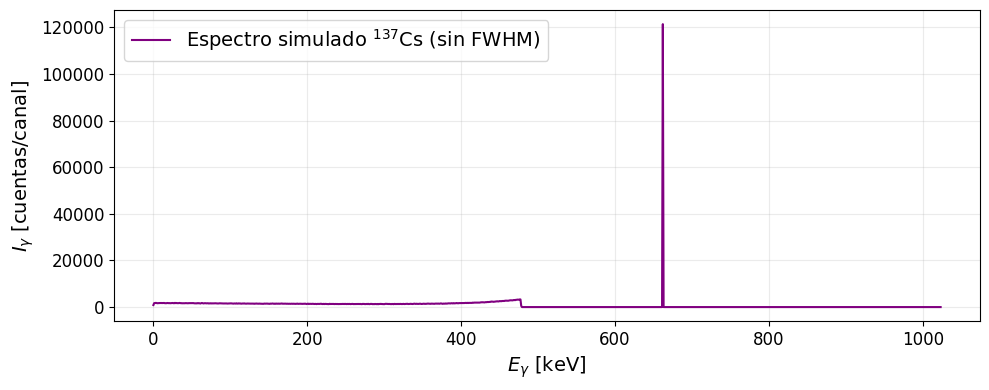

Ee_max = 477.65013623978206 keV


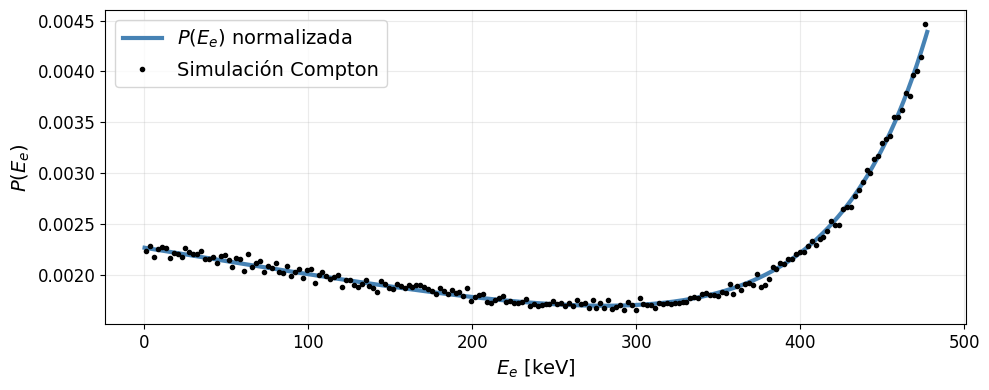

In [33]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

rn.seed(123)
np.random.seed(123)

mec2 = 511.0  # keV

def calibracion(E):
    return E

def acumulada(pdf):
    return np.cumsum(pdf)

def paso1_interaccion(mu_f, mu_C, t):
    mu = mu_f + mu_C
    P_int = 1 - np.exp(-mu*t)

    pdf = np.array([1-P_int, P_int])
    F = acumulada(pdf)

    return 1 if rn.random() > F[0] else 0


def paso2_tipo_interaccion(mu_f, mu_C):
    P_f = mu_f / (mu_f + mu_C)

    pdf = np.array([P_f, 1-P_f])
    F = acumulada(pdf)

    return 0 if rn.random() < F[0] else 1


def dsigma_dEe(Ee, E1):
    eps = E1 / mec2
    tiny = 1e-12
    Ee = np.array(Ee, dtype=float)
    eps_e = Ee / E1
    eps_e = np.clip(eps_e, tiny, 1.0 - tiny)
    # prefactor no relevante para la forma (se normaliza luego)
    term1 = 2.0
    term2 = (eps_e**2) / (eps**2 * (1.0 - eps_e)**2)
    term3 = (eps_e / (1.0 - eps_e)) * (eps_e - 2.0/eps)
    ds = (term1 + term2 + term3)
    ds = np.where((Ee >= 0) & (Ee <= E1*(2*eps)/(1+2*eps)), ds, 0.0)
    ds = np.where(ds > 0, ds, 0.0)
    Ee_max = E1 * (2*eps) / (1 + 2*eps)
    return ds, Ee_max


def construir_cdf_from_dsigma(E1, n_bins=2000):
    _, Ee_max = dsigma_dEe([0.0], E1)
    edges = np.linspace(0.0, Ee_max, n_bins + 1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    binw = edges[1] - edges[0]

    ds_vals, _ = dsigma_dEe(centers, E1)
    integral = np.sum(ds_vals * binw)
    if integral <= 0:
        raise RuntimeError("Integral de dσ/dE_e nula o negativa. Revisa E1.")
    pdf = ds_vals / integral
    cdf = np.cumsum(pdf * binw)
    cdf = cdf / cdf[-1]
    return centers, pdf, cdf, binw, Ee_max

def sample_Ee_from_cdf(centers, cdf, binw):
    r = rn.random()
    i = np.searchsorted(cdf, r, side='left')
    if i >= len(centers):
        i = len(centers) - 1
    return float(np.clip(centers[i] + (rn.random()-0.5)*binw, 0, centers[-1]))


def simular_ModeloA_noFWHM(
        N, mu_f, mu_C, t, E1,
        centers, pdf, cdf, binw,
        N_CHANNELS=1024):

    hist = np.zeros(N_CHANNELS, dtype=int)


    # para comparar con la teoría más adelante
    Ee_compton_list = []

    for _ in range(N):

        # Paso I: interactúa?
        if paso1_interaccion(mu_f, mu_C, t) == 0:
            continue

        # Paso II: tipo de interacción
        tipo = paso2_tipo_interaccion(mu_f, mu_C)

        # Paso III–IV: depósito energético
        if tipo == 0:      # fotoeléctrico
            E_dep = E1
        else:              # Compton
            E_dep = sample_Ee_from_cdf(centers, cdf, binw)
            Ee_compton_list.append(E_dep)                   # cuando ocurra Compton, guardo las energías para compararlas ahora con la distribución teórica

        # Sin FWHM: energía medida = energía depositada
        E_med = E_dep

        # Convertir a canal (1 keV = 1 canal)
        canal = int(round(calibracion(E_med)))
        if 0 <= canal < N_CHANNELS:
            hist[canal] += 1

    return hist, np.array(Ee_compton_list)

# --------------------------------------------------
# parámetros y ejecución
# --------------------------------------------------
E1 = 662.0                # keV
rho = 3.667               # g/cm^3
mu_f = 1.079e-02 * rho    # mu fotoeléctrico (cm^-1)
mu_C = 6.822e-02 * rho    # mu Compton (cm^-1)
t = 3 * 2.54              # grosor efectivo (cm)
N = 1000000                 # fotones a simular

centers, pdf, cdf, binw, Ee_max = construir_cdf_from_dsigma(E1)

histograma, Ee_compton = simular_ModeloA_noFWHM(
    N, mu_f, mu_C, t, E1, centers, pdf, cdf, binw, N_CHANNELS=1024)

plt.figure(figsize=(10,4))
plt.plot(histograma, color='purple', label='Espectro simulado $^{137}$Cs (sin FWHM)')
plt.xlabel("$E_\\gamma$ [keV]", fontsize=14)
plt.ylabel("$I_\\gamma$ [cuentas/canal]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(alpha=0.25)

# plt.axvline(round(E1), color='orange', linestyle='--', linewidth=1.8, label=f'Fotoeléctrico {E1:.0f} keV')
# plt.axvline(round(Ee_max), color='cyan', linestyle='--', linewidth=1.8, label=f'Borde Compton {Ee_max:.1f} keV')

plt.tight_layout()
plt.show()

print("Ee_max =", Ee_max, "keV")


histC, bins = np.histogram(Ee_compton, bins=200, density=True)
bcent = 0.5*(bins[:-1] + bins[1:])

plt.figure(figsize=(10,4))
plt.plot(centers, pdf, color='steelblue', lw=3, label="$P(E_e)$ normalizada")
plt.plot(bcent, histC, 'ko', markersize=3, label="Simulación Compton")
plt.xlabel("$E_e$ [keV]", fontsize=14)
plt.ylabel("$P(E_e)$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


# Punto 6

In [1]:
def leer_dat(archivo):
    data = np.loadtxt(archivo,skiprows=1)
    canales = data[:,0].astype(int)
    cuentas = data[:,1]
    return canales, cuentas

def restar_fondo(cuentas, fondo):
    dif = cuentas - fondo
    dif[dif < 0] = 0
    return dif

mec2 = 511.0  # keV

# Calibración del espectro experimental:
a0_exp = -55.6
a1_exp = 3.1973

def canal_a_energia_exp(canal):
    return a0_exp + a1_exp * canal


# FWHM experimental encontrada en informe 2
def FWHM_fn(E):
    return -1.9+2.05*np.sqrt(E)

def energia_detectada(E, FWHM_fn):
    FWHM = FWHM_fn(E)
    FWHM = max(FWHM, 0.0)
    sigma = FWHM / 2.35
    return max(np.random.normal(loc=E, scale=sigma), 0.0)

def calibracion(E):
    return E


def acumulada(pdf):
    return np.cumsum(pdf)

def paso1_interaccion(mu_f, mu_C, t):
    mu = mu_f + mu_C
    P_int = 1 - np.exp(-mu * t)
    pdf = np.array([1-P_int, P_int])
    F = acumulada(pdf)
    r = rn.random()
    return 0 if r < F[0] else 1

def paso2_tipo_interaccion(mu_f, mu_C):
    P_f = mu_f / (mu_f + mu_C)
    pdf = np.array([P_f, 1-P_f])
    F = acumulada(pdf)
    r = rn.random()
    return 0 if r < F[0] else 1


def dsigma_dEe(Ee, E1):
    eps = E1 / mec2
    tiny = 1e-12
    Ee = np.array(Ee)
    eps_e = Ee/E1
    eps_e = np.clip(eps_e, tiny, 1-tiny)

    term1 = 2
    term2 = (eps_e**2)/(eps**2*(1-eps_e)**2)
    term3 = (eps_e/(1-eps_e))*(eps_e - 2/eps)

    ds =(term1+term2+term3)
    ds = np.where(ds>0, ds, 0)
    Ee_max = E1*(2*eps)/(1+2*eps)
    ds = np.where(Ee<=Ee_max, ds, 0)
    return ds, Ee_max

def construir_cdf_from_dsigma(E1, n_bins=2000):
    _, Ee_max = dsigma_dEe([0], E1)
    edges = np.linspace(0, Ee_max, n_bins+1)
    centers = 0.5*(edges[:-1] + edges[1:])
    binw = edges[1] - edges[0]

    ds, _ = dsigma_dEe(centers, E1)
    integral = np.sum(ds*binw)
    pdf = ds / integral
    cdf = np.cumsum(pdf * binw)
    cdf /= cdf[-1]
    return centers, pdf, cdf, binw, Ee_max

def sample_Ee_from_cdf(centers, cdf, binw):
    r = rn.random()
    i = np.searchsorted(cdf, r, side="left")
    if i >= len(centers):
        i = len(centers)-1
    return float(np.clip(centers[i] + (rn.random()-0.5)*binw, 0, centers[-1]))

def simular_ModeloA(N, mu_f, mu_C, t, E1,
                    centers, pdf, cdf, binw,
                    N_CHANNELS=1024):

    hist = np.zeros(N_CHANNELS, dtype=int)

    for _ in range(N):

        if paso1_interaccion(mu_f, mu_C, t) == 0:
            continue

        tipo = paso2_tipo_interaccion(mu_f, mu_C)

        if tipo == 0:     # fotoeléctrico
            E_dep = E1
        else:             # Compton
            E_dep = sample_Ee_from_cdf(centers, cdf, binw)

        # FWHM
        E_med = energia_detectada(E_dep, FWHM_fn)

        # canal = keV
        canal = int(round(calibracion(E_med)))
        if 0 <= canal < N_CHANNELS:
            hist[canal] += 1

    return hist


E1 = 662.0   # keV

rho = 3.667  # g/cm3
mu_f = 1.079e-02 * rho   # fotoeléctrico
mu_C = 6.822e-02 * rho   # Compton
t = 3 * 2.54              # 3 pulgadas en cm

N = 1000000                # fotones

# Construcción del CDF de Compton
centers, pdf, cdf, binw, Ee_max = construir_cdf_from_dsigma(E1)

# Simulación con FWHM
hist_sim = simular_ModeloA(N, mu_f, mu_C, t, E1,
                           centers, pdf, cdf, binw,
                           N_CHANNELS=1024)



# Leer datos
canal_exp, cuentas_exp = leer_dat("NaI_137Cs_600s.dat")
canal_bg, cuentas_bg = leer_dat("NaI_Fondo_600s.dat")

# Restar fondo
cuentas_corr = restar_fondo(cuentas_exp, cuentas_bg)

# Convertir canal → energía (keV)
energia_exp = canal_a_energia_exp(canal_exp)



plt.figure(figsize=(12,5))

plt.plot(hist_sim, label="Espectro simulado", color='purple', linewidth=2)
plt.plot(energia_exp, cuentas_corr, label="Espectro experimental", color='darkorange', linewidth=2, alpha=0.7)

plt.xlabel("$E_\gamma$ [keV]", fontsize=14)
plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,1024)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.show()

print("Energía del borde Compton (teórica):", Ee_max, "keV")


<>:157: SyntaxWarning: invalid escape sequence '\g'
<>:158: SyntaxWarning: invalid escape sequence '\g'
<>:157: SyntaxWarning: invalid escape sequence '\g'
<>:158: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-2290442300.py:157: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$E_\gamma$ [keV]", fontsize=14)
/tmp/ipython-input-2290442300.py:158: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)


NameError: name 'np' is not defined

#Punto 7

<>:165: SyntaxWarning: invalid escape sequence '\g'
<>:165: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-39135515.py:165: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)


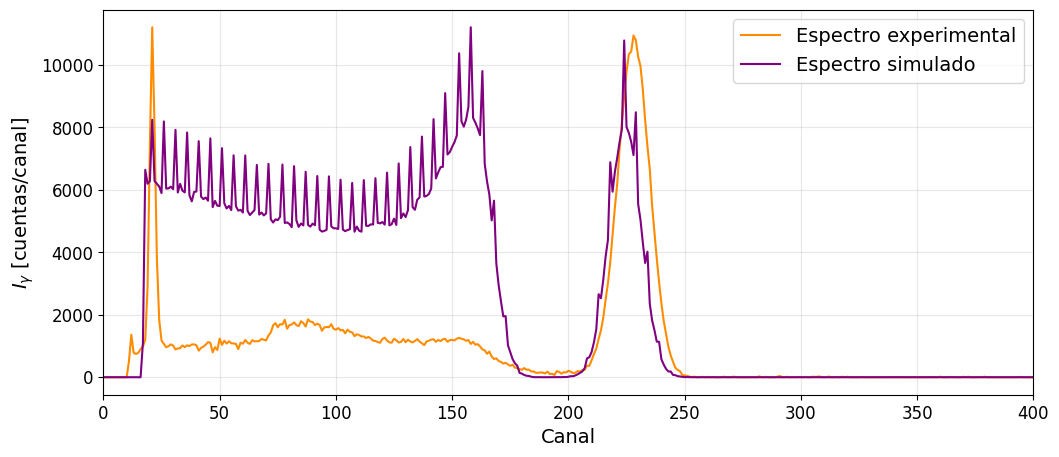

Ee_max teórico = 477.65013623978206 keV


In [36]:
def leer_dat(archivo):
    data = np.loadtxt(archivo, skiprows=1)
    canales = data[:,0].astype(int)
    cuentas = data[:,1]
    return canales, cuentas

def restar_fondo(cuentas, fondo):
    dif = cuentas - fondo
    dif[dif < 0] = 0
    return dif


mec2 = 511.0  # keV

def FWHM_fn(E):                       # calibración del informe
    return -1.9 + 2.05*np.sqrt(E)

def energia_detectada(E, FWHM_fn):
    FWHM = FWHM_fn(E)
    FWHM = max(FWHM, 0.0)
    sigma = FWHM / 2.35
    return max(np.random.normal(loc=E, scale=sigma), 0.0)

# En el punto anterior: E = canal (1 canal = 1 keV)
def calibracion_simulada(E):
    return E


def acumulada(pdf):
    return np.cumsum(pdf)

def paso1_interaccion(mu_f, mu_C, t):
    mu = mu_f + mu_C
    P_int = 1 - np.exp(-mu * t)
    pdf = np.array([1-P_int, P_int])
    F = acumulada(pdf)
    return 1 if rn.random() > F[0] else 0

def paso2_tipo_interaccion(mu_f, mu_C):
    P_f = mu_f / (mu_f + mu_C)
    F = acumulada(np.array([P_f, 1-P_f]))
    return 1 if rn.random() > F[0] else 0  # 0=foto, 1=Compton

def dsigma_dEe(Ee, E1):
    eps = E1 / mec2
    tiny = 1e-12
    Ee = np.array(Ee)
    eps_e = Ee/E1
    eps_e = np.clip(eps_e, tiny, 1-tiny)

    term1 = 2
    term2 = (eps_e**2)/(eps**2*(1-eps_e)**2)
    term3 = (eps_e/(1-eps_e))*(eps_e - 2/eps)

    ds =(term1+term2+term3)
    ds = np.where(ds>0, ds, 0)

    Ee_max = E1*(2*eps)/(1+2*eps)
    ds = np.where(Ee<=Ee_max, ds, 0)
    return ds, Ee_max

def construir_cdf_from_dsigma(E1, n_bins=2000):
    _, Ee_max = dsigma_dEe([0], E1)
    edges = np.linspace(0, Ee_max, n_bins+1)
    centers = 0.5*(edges[:-1] + edges[1:])
    binw = edges[1] - edges[0]

    ds, _ = dsigma_dEe(centers, E1)
    integral = np.sum(ds * binw)
    pdf = ds / integral
    cdf = np.cumsum(pdf * binw)
    return centers, pdf, cdf / cdf[-1], binw, Ee_max

def sample_Ee_from_cdf(centers, cdf, binw):
    r = rn.random()
    i = np.searchsorted(cdf, r)
    if i >= len(centers):
        i = len(centers) - 1
    return float(np.clip(centers[i] + (rn.random()-0.5)*binw, 0, centers[-1]))

def simular_ModeloA(N, mu_f, mu_C, t, E1,
                    centers, pdf, cdf, binw,
                    N_CHANNELS=5000):

    hist = np.zeros(N_CHANNELS, dtype=float)

    for _ in range(N):
        if paso1_interaccion(mu_f, mu_C, t) == 0:
            continue

        tipo = paso2_tipo_interaccion(mu_f, mu_C)

        if tipo == 0:
            E_dep = E1
        else:
            E_dep = sample_Ee_from_cdf(centers, cdf, binw)

        E_med = energia_detectada(E_dep, FWHM_fn)
        canal = int(round(calibracion_simulada(E_med)))

        if 0 <= canal < N_CHANNELS:
            hist[canal] += 1

    return hist


E1 = 662.0
rho = 3.667
mu_f = 1.079e-02 * rho
mu_C = 6.822e-02 * rho
t = 3 * 2.54

N = 1000000


centers, pdf, cdf, binw, Ee_max = construir_cdf_from_dsigma(E1)


hist_sim = simular_ModeloA(N, mu_f, mu_C, t, E1,
                           centers, pdf, cdf, binw,
                           N_CHANNELS=5000)


canal_exp, cuentas_exp = leer_dat("NaI_137Cs_600s.dat")
canal_bg, cuentas_bg = leer_dat("NaI_Fondo_600s.dat")

cuentas_corr = restar_fondo(cuentas_exp, cuentas_bg)


a0_exp = -55.6
a1_exp = 3.1973

def canal_a_energia_exp(c):
    return a0_exp + a1_exp * c

energia_exp = canal_a_energia_exp(canal_exp)


# misma calibración para simulado y experimental

def energia_a_canal_exp(E):
    return (E - a0_exp) / a1_exp

# convertir simulado (keV → canal calibrado)
N_CHANNELS_EXP = 1024
hist_sim_expcal = np.zeros(N_CHANNELS_EXP)

for canal_keV, cuentas in enumerate(hist_sim):
    E = canal_keV
    canal_new = int(round(energia_a_canal_exp(E)))
    if 0 <= canal_new < N_CHANNELS_EXP:
        hist_sim_expcal[canal_new] += cuentas

# normalizar fondo Compton
max_exp = np.max(cuentas_corr)
max_sim = np.max(hist_sim_expcal)
factor = max_exp / max_sim
hist_sim_norm = hist_sim_expcal * factor

# gráfica del punto 7 (en canales)
plt.figure(figsize=(12,5))
plt.plot(canal_exp, cuentas_corr, label="Espectro experimental", color="darkorange")
plt.plot(hist_sim_norm, label="Espectro simulado", color="purple")
plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I_\gamma$ [cuentas/canal]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,400)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.show()

print("Ee_max teórico =", Ee_max, "keV")
